**AIR QUALITY PREDICTION MODEL**








---



In [3]:
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

**DATASET**

---



In [5]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [6]:
df.shape

(29531, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


**NULL VALUES IN EACH** **COLUMN**



In [8]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

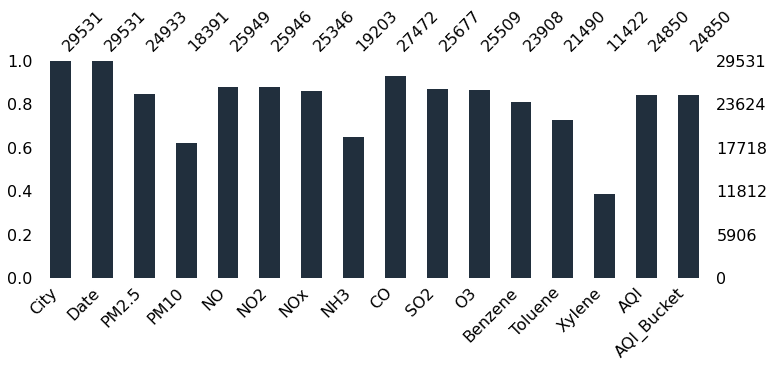

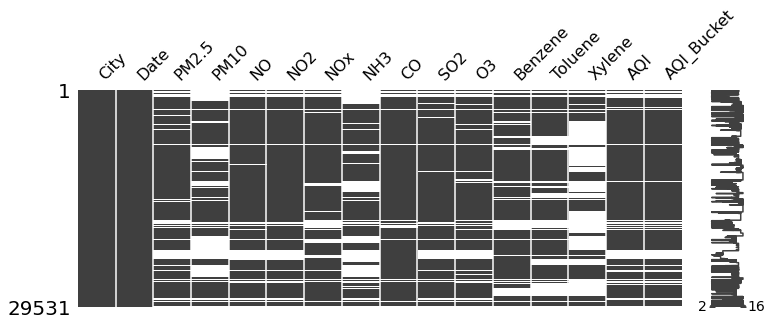

In [9]:
msno.bar(df,color='#212F3D',figsize=(12,4) ) #ploting missing values --bar
msno.matrix(df,figsize=(12,4))

In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


**VARIATION IN AQI LEVEL WITH EACH EACH** **POLLUTANT**

---



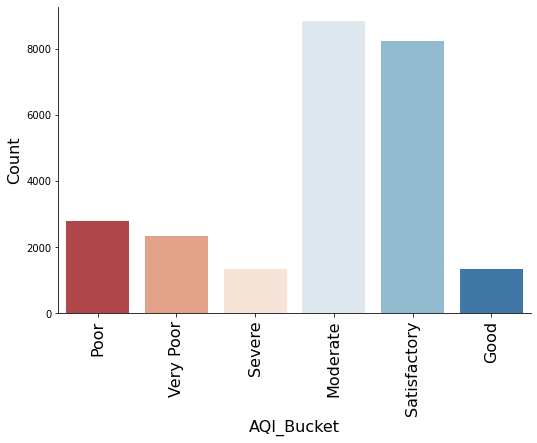

In [10]:
plot=sns.catplot(kind='count',x='AQI_Bucket',data=df,palette='RdBu',aspect=1.5)
plot.set_xticklabels(rotation=90,fontsize=16)
plot.set_xlabels("AQI_Bucket",fontsize=16)
plot.set_ylabels("Count",fontsize=16)
plt.show()

In [ ]:
df['City'].value_counts()

Ahmedabad             2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: City, dtype: int64

**CITIES WITH THE LARGEST DATASET**

---



[]

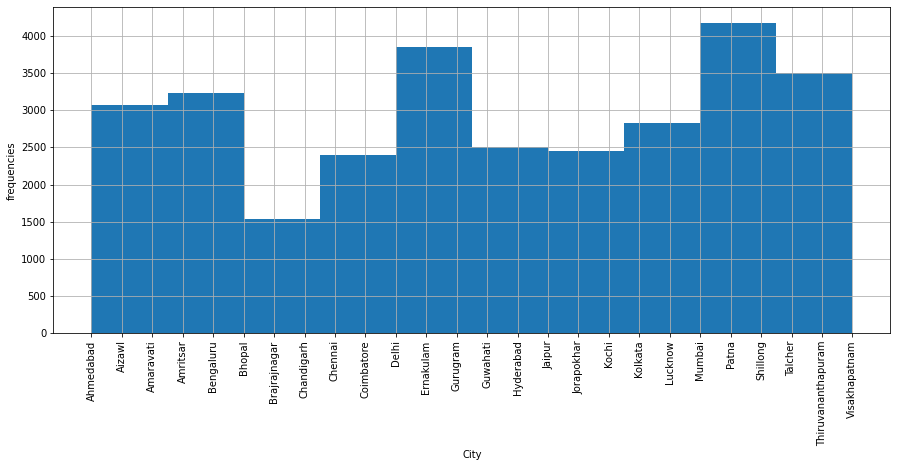

In [ ]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.City.hist()
plt.xlabel("City")
plt.ylabel("frequencies")
plt.plot()

**CITIES WITH THE HIGHEST SO2 POLLUTION INDEX**

---



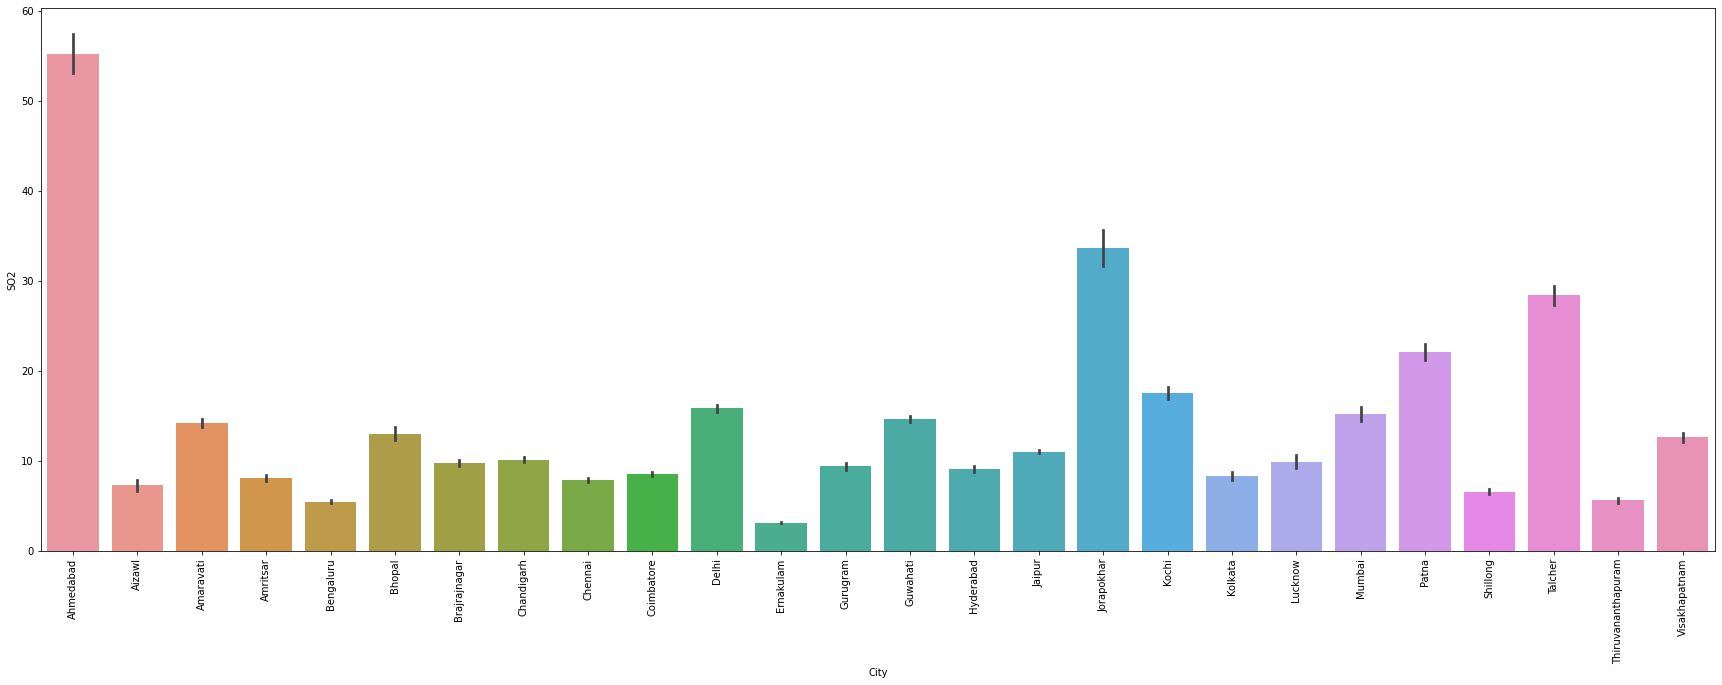

In [ ]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x="City",y="SO2",data=df)

**CITIES WITH THE HIGHEST NO2 POLLUTION INDEX**

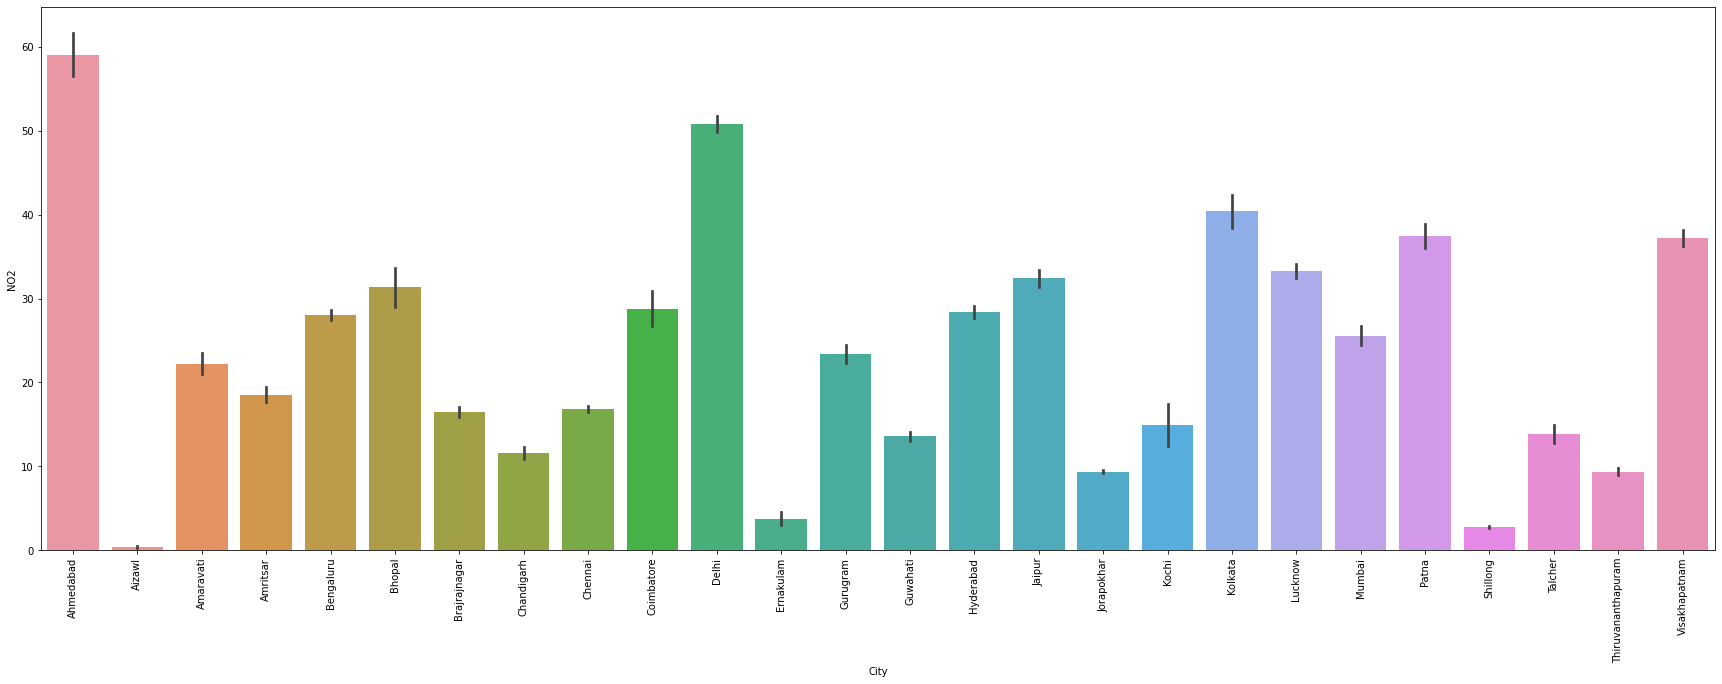

In [ ]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x="City",y="NO2",data=df)

**CITIES WITH THE HIGHEST O3 POLLUTION INDEX**

---



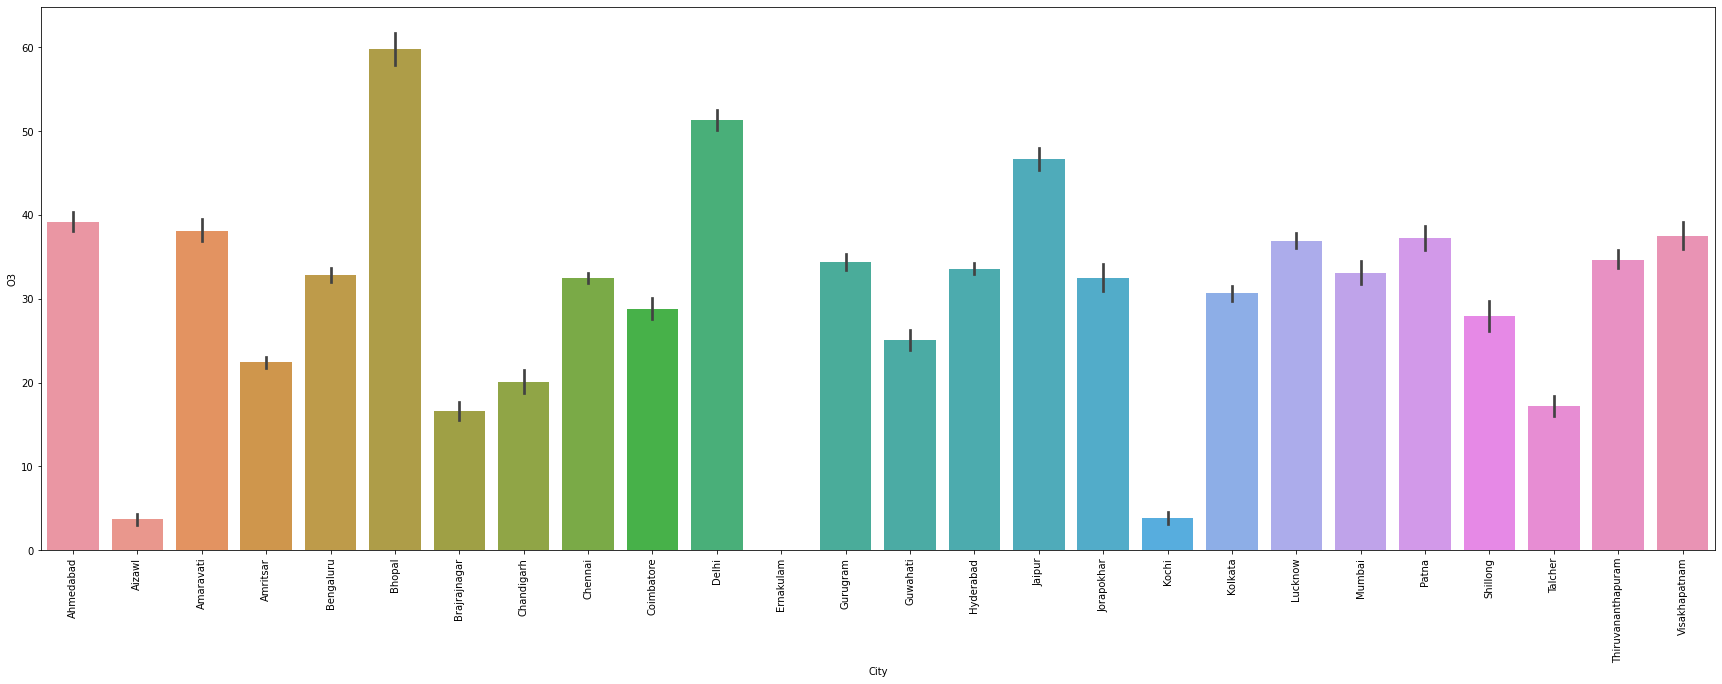

In [ ]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x="City",y="O3",data=df)

In [ ]:
df


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


**DROPPING THE NOT REQUIRED FIELDS LIKE DATE,** **ETC**

---



In [ ]:
df.drop(['City'],axis=1,inplace=True)
df.drop(['Date'],axis=1,inplace=True)
df.drop(['Xylene'],axis=1,inplace=True)
df.drop(['Toluene'],axis=1,inplace=True)
df.drop(['Benzene'],axis=1,inplace=True)
df.drop(['NO'],axis=1,inplace=True)


In [ ]:
df.isnull().sum()

PM2.5          4598
PM10          11140
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
AQI            4681
AQI_Bucket     4681
dtype: int64

**HANDLING THE MISSING VALUES IN THE DATASET**

---



In [ ]:
df['PM2.5']=df['PM2.5'].fillna((df['PM2.5'].median()))

df['PM10']=df['PM10'].fillna((df['PM10'].median()))

df['NO2']=df['NO2'].fillna((df['NO2'].median()))

df['NOx']=df['NOx'].fillna((df['NOx'].median()))

df['NH3']=df['NH3'].fillna((df['NH3'].median()))

df['CO']=df['CO'].fillna((df['CO'].median()))

df['SO2']=df['SO2'].fillna((df['SO2'].median()))

df['O3']=df['O3'].fillna((df['O3'].median()))

df['AQI']=df['AQI'].fillna((df['AQI'].median()))

In [ ]:
df['AQI_Bucket']=df['AQI_Bucket'].fillna(df['AQI_Bucket'].mode()[0])

In [ ]:
df


,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
0,48.57,95.68,18.22,17.15,15.85,0.92,27.64,133.36,118.0,Moderate
1,48.57,95.68,15.69,16.46,15.85,0.97,24.55,34.06,118.0,Moderate
2,48.57,95.68,19.30,29.70,15.85,17.40,29.07,30.70,118.0,Moderate
3,48.57,95.68,18.48,17.97,15.85,1.70,18.59,36.08,118.0,Moderate
4,48.57,95.68,21.42,37.76,15.85,22.10,39.33,39.31,118.0,Moderate
...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,25.06,19.54,12.47,0.47,8.55,23.30,41.0,Good
29527,24.38,74.09,26.06,16.53,11.99,0.52,12.72,30.14,70.0,Satisfactory
29528,22.91,65.73,29.53,18.33,10.71,0.48,8.42,30.96,68.0,Satisfactory
29529,16.64,49.97,29.26,18.80,10.03,0.52,9.84,28.30,54.0,Satisfactory


In [ ]:
df.isnull().sum()

PM2.5         0
PM10          0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
AQI           0
AQI_Bucket    0
dtype: int64

**INDIVIUAL POLLUTION INDEX CALCULATION OF PM25**

---



In [ ]:
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0
  
df['pm25_i']=df['PM2.5'].apply(get_PM25_subindex)
data=df[['PM2.5','pm25_i']]
data.head()



,PM2.5,pm25_i
0,48.57,80.95
1,48.57,80.95
2,48.57,80.95
3,48.57,80.95
4,48.57,80.95


**INDIVIUAL POLLUTION INDEX CALCULATION OF PM10**

---



In [ ]:
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0


df['pm10_i']=df['PM10'].apply( get_PM10_subindex)
data=df[['PM10','pm10_i']]
data.head()

,PM10,pm10_i
0,95.68,95.68
1,95.68,95.68
2,95.68,95.68
3,95.68,95.68
4,95.68,95.68


**INDIVIUAL POLLUTION INDEX CALCULATION OF SO2**

---



In [ ]:
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df['soi']=df['SO2'].apply(get_SO2_subindex)
data=df[['SO2','soi']]
data.head()

,SO2,soi
0,27.64,34.5500
1,24.55,30.6875
2,29.07,36.3375
3,18.59,23.2375
4,39.33,49.1625


**INDIVIUAL POLLUTION INDEX CALCULATION OF NOx**

---



In [ ]:
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0


df['nox']=df['NOx'].apply(get_NOx_subindex)
data=df[['NOx','nox']]
data.head()

,NOx,nox
0,17.15,21.4375
1,16.46,20.5750
2,29.70,37.1250
3,17.97,22.4625
4,37.76,47.2000


**INDIVIUAL POLLUTION INDEX CALCULATION OF NH3**

---



In [ ]:
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df['nh3i']=df['NH3'].apply(get_NH3_subindex)
data=df[['NH3','nh3i']]
data.head()

,NH3,nh3i
0,15.85,3.9625
1,15.85,3.9625
2,15.85,3.9625
3,15.85,3.9625
4,15.85,3.9625


**INDIVIUAL POLLUTION INDEX CALCULATION OF CO**

---



In [ ]:
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df['coi']=df['CO'].apply(get_CO_subindex)
data=df[['CO','coi']]
data.head()


,CO,coi
0,0.92,46.000000
1,0.97,48.500000
2,17.40,302.352941
3,1.70,85.000000
4,22.10,330.000000


**INDIVIUAL POLLUTION INDEX CALCULATION OF O3**

---



In [ ]:
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df['o3i']=df['O3'].apply(get_O3_subindex)
data=df[['O3','o3i']]
data.head()

,O3,o3i
0,133.36,149.058824
1,34.06,34.060000
2,30.70,30.700000
3,36.08,36.080000
4,39.31,39.310000


In [ ]:
df['AQI_Bucket'].value_counts()

Moderate        13510
Satisfactory     8224
Poor             2781
Very Poor        2337
Good             1341
Severe           1338
Name: AQI_Bucket, dtype: int64

In [ ]:
df["AQI_calculated"] = round(df[["pm25_i", "pm10_i", "soi", "nox",
                                 "nh3i", "coi", "o3i"]].max(axis = 1))

In [ ]:
df


,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,pm25_i,pm10_i,soi,nox,nh3i,coi,o3i,AQI_calculated
0,48.57,95.68,18.22,17.15,15.85,0.92,27.64,133.36,118.0,Moderate,80.950000,95.68,34.5500,21.4375,3.9625,46.000000,149.058824,149.0
1,48.57,95.68,15.69,16.46,15.85,0.97,24.55,34.06,118.0,Moderate,80.950000,95.68,30.6875,20.5750,3.9625,48.500000,34.060000,96.0
2,48.57,95.68,19.30,29.70,15.85,17.40,29.07,30.70,118.0,Moderate,80.950000,95.68,36.3375,37.1250,3.9625,302.352941,30.700000,302.0
3,48.57,95.68,18.48,17.97,15.85,1.70,18.59,36.08,118.0,Moderate,80.950000,95.68,23.2375,22.4625,3.9625,85.000000,36.080000,96.0
4,48.57,95.68,21.42,37.76,15.85,22.10,39.33,39.31,118.0,Moderate,80.950000,95.68,49.1625,47.2000,3.9625,330.000000,39.310000,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,25.06,19.54,12.47,0.47,8.55,23.30,41.0,Good,25.033333,50.94,10.6875,24.4250,3.1175,23.500000,23.300000,51.0
29527,24.38,74.09,26.06,16.53,11.99,0.52,12.72,30.14,70.0,Satisfactory,40.633333,74.09,15.9000,20.6625,2.9975,26.000000,30.140000,74.0
29528,22.91,65.73,29.53,18.33,10.71,0.48,8.42,30.96,68.0,Satisfactory,38.183333,65.73,10.5250,22.9125,2.6775,24.000000,30.960000,66.0
29529,16.64,49.97,29.26,18.80,10.03,0.52,9.84,28.30,54.0,Satisfactory,27.733333,49.97,12.3000,23.5000,2.5075,26.000000,28.300000,50.0


In [11]:
cr=df.corr()
cr.style.background_gradient(cmap='coolwarm')

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
PM2.5,1.000000,0.846498,0.433491,0.350709,0.436792,0.275086,0.089912,0.132325,0.161238,0.023911,0.117080,0.114579,0.659181
PM10,0.846498,1.000000,0.502349,0.464380,0.527768,0.376816,0.112588,0.256974,0.244919,0.022265,0.169335,0.081700,0.803313
NO,0.433491,0.502349,1.000000,0.478070,0.794890,0.185621,0.212607,0.170322,0.014580,0.035771,0.150857,0.094237,0.452191
NO2,0.350709,0.464380,0.478070,1.000000,0.627627,0.234938,0.356521,0.392233,0.293349,0.025260,0.273926,0.171701,0.537071
NOx,0.436792,0.527768,0.794890,0.627627,1.000000,0.166224,0.226992,0.238397,0.093170,0.039121,0.189386,0.087398,0.486450
NH3,0.275086,0.376816,0.185621,0.234938,0.166224,1.000000,0.104891,-0.038998,0.094972,-0.015650,0.013227,-0.019813,0.252019
CO,0.089912,0.112588,0.212607,0.356521,0.226992,0.104891,1.000000,0.489697,0.041736,0.061861,0.277904,0.154889,0.683346
SO2,0.132325,0.256974,0.170322,0.392233,0.238397,-0.038998,0.489697,1.000000,0.162142,0.036110,0.296139,0.251195,0.490586
O3,0.161238,0.244919,0.014580,0.293349,0.093170,0.094972,0.041736,0.162142,1.000000,0.020255,0.130209,0.111410,0.198991
Benzene,0.023911,0.022265,0.035771,0.025260,0.039121,-0.015650,0.061861,0.036110,0.020255,1.000000,0.739286,0.415427,0.044407


In [ ]:
X=df[["pm25_i", "pm10_i", "soi", "nox","nh3i", "coi", "o3i"]	]
Y=df['AQI']

In [ ]:
X.head()
Y.head()

0    118.0
1    118.0
2    118.0
3    118.0
4    118.0
Name: AQI, dtype: float64

In [ ]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.2,random_state=70)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
Scaler = StandardScaler()

In [ ]:
X_Train = Scaler.fit_transform(X_Train)
X_Test = Scaler.fit_transform(X_Test)

**Among mutiple regression models RandomForestRegressor have the highest accuracy**

---



In [ ]:
DT=RandomForestRegressor()
DT.fit(X_Train,Y_Train)

RandomForestRegressor()

In [ ]:
train_pred=DT.predict(X_Train)
test_pred=DT.predict(X_Test)

In [ ]:


print("Rsquare train",DT.score(X_Train,Y_Train))
print("Rsquare test",DT.score(X_Test,Y_Test))


Rsquare train 0.9813590411275124
Rsquare test 0.8622931649610445
